In [69]:
from astrodbkit import astrodb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.coordinates as coord
import astropy.units as u



In [70]:
def nplotCoords(db_sources, matches, new_objects):
    import astropy.coordinates as coord
    import astropy.units as u
    import matplotlib.pyplot as plt
    import numpy as np
    # ===============================================
    # Plotting coordinates
    # ===============================================
    # converting BDNYC database coordinates for plot
    db_ra = coord.Angle(pd.to_numeric(db_sources['ra']).fillna(np.nan).values*u.degree)
    db_ra = db_ra.wrap_at(180*u.degree)
    db_dec = coord.Angle(pd.to_numeric(db_sources['dec']).fillna(np.nan).values*u.degree)
    # converting matches csv coordinates
    matches_ra = coord.Angle(matches['RA'].values*u.degree)
    matches_ra = matches_ra.wrap_at(180*u.degree)
    matches_dec = coord.Angle(matches['DEC'].values*u.degree)
    # converting new_objects csv coordinates
    new_objects_ra = coord.Angle(new_objects['RA'].values*u.degree)
    new_objects_ra = new_objects_ra.wrap_at(180*u.degree)
    new_objects_dec = coord.Angle(new_objects['DEC'].values*u.degree)
    fig = plt.figure(figsize=(14,12))
    ax = fig.add_subplot(111, projection="mollweide")
    ax.set_facecolor('#17303F')
    plt.grid(True)
    ax.scatter(db_ra.radian, db_dec.radian, color="#E5E5E5", alpha=.8, edgecolors='face', label='in BDNYC database')
    ax.scatter(matches_ra.radian, matches_dec.radian, color="#F24333", label='in BDNYC database and GAIA dataset')
    ax.scatter(new_objects_ra.radian, new_objects_dec.radian, color="#E3B505", label='in GAIA dataset')
    ax.legend(loc=4)

In [71]:
db = astrodb.Database("bdnycdev1.db")

Database ready for use


In [72]:
db.info()     #how many pieces of info per row


Database path: bdnycdev1.db 
SQL path: bdnycdev1.sql

Database Inventory
SOURCES: 1938
CHANGELOG: 205
DATA_REQUESTS: 27
IGNORE: 122
INSTRUMENTS: 54
MODES: 7
PARALLAXES: 436
PHOTOMETRY: 10358
PROPER_MOTIONS: 599
PUBLICATIONS: 607
RADIAL_VELOCITIES: 143
SPECTRA: 3614
SPECTRAL_TYPES: 1511
SYSTEMS: 15
TELESCOPES: 38
VERSIONS: 2


In [73]:
db.help() #methods


The astrodb.Database class, hereafter db, provides a variety of methods to interact with a SQLite database file.
Docstrings are available for all methods and can be accessed in the usual manner; eg, help(db.query).
We list a few key methods below.

    Methods to explore the database:
    * db.query() - send SELECT commands to the database. Returns results in a variety of formats
    * db.info() - get a quick summary of the contents of the database
    * db.schema() - quickly examine the columns, types, etc of a specified table
    * db.search() - search through a table to find entries matching the criteria
    * db.inventory() - search for all entries that match the specified source_id
    * db.references() - search for all entries in all tables matching the criteria. Useful for publications

    Methods to modify the database:
    * db.add_data() - add data to an existing table, either by providing a file or by providing the data itself
    * db.table() - create or modify tables in 

In [74]:
db.inventory(72)    # ra and dec are like longitude and latitude of space  
#OPT spectral type in optical range #using spectral types, and find out most common spectral type


SOURCES
id         ra      dec             designation pub_shortname   unum shortname                   names components companions comments version
-- ---------- -------- ----------------------- ------------- ------ --------- ----------------------- ---------- ---------- -------- -------
72 128.992875 5.808556 2MASS J08355829+0548308       Reid08b U20307 0835+0548 2MASS J08355829+0548308          -          -        -     2.0

PHOTOMETRY
  id     band magnitude magnitude_unc system_id scope_id inst_id pub_shortname epoch comments version
---- -------- --------- ------------- --------- -------- ------- ------------- ----- -------- -------
 956   SDSS_u  24.13363      0.786999         1        1       -             -     -        -       -
 957   SDSS_g  24.11857     0.4055846         1        1       -             -     -        -       -
 958   SDSS_r  21.69148    0.09269092         1        1       -             -     -        -       -
 959   SDSS_i   19.0747    0.01522073         

In [75]:
db.inventory(11) #Ir is infared


SOURCES
id        ra        dec designation pub_shortname   unum shortname                          names components companions  comments version
-- --------- ---------- ----------- ------------- ------ --------- ------------------------------ ---------- ---------- --------- -------
11 181.88942 -39.548306      TWA 27       Gizi02b U40008 1207-3932 TWA 27, 2MASS J12073346-393253 1352, 2028          - young/TWA     1.0

PARALLAXES
 id parallax parallax_unc pub_shortname adopted comments version
--- -------- ------------ ------------- ------- -------- -------
128     19.1          0.4        Duco08       -              1.0

PHOTOMETRY
   id     band magnitude magnitude_unc system_id scope_id inst_id pub_shortname      epoch        comments version
----- -------- --------- ------------- --------- -------- ------- ------------- ---------- --------------- -------
 4031  WISE_W2    11.009          0.02         3        3       -        Cutr12          -               -     1.0
 4032  WISE_W

In [76]:
db.query('SELECT * FROM sources LIMIT 10', fmt = "pandas")  
#* is all columns
#print iut all the colums from sources for first 10 rows

,comments,companions,components,dec,designation,id,names,publication_shortname,ra,shortname,unum,version
0,,None,None,18.333275,SDSS J16585026+1820006,1,SDSS J16585026+1820006,West08,254.709737,1658+1820,U51440,2.0
1,,None,None,-1.280556,2MASS J13314894-0116500,2,"SDSS J133148.92-011651.4, 2MASS J13314894-0116500",Hawl02,202.953870,1331-0116,U50174,2.0
2,None,None,"1619,1620",-4.105361,2MASS J23310161-0406193,3,2MASS J23310161-0406193,Gizi00,352.756710,2331-0406,U12191,2.0
3,None,None,None,10.533056,2MASS J14482563+1031590,4,"2MASS J14482563+1031590, 2MASSW J1448256+10315...",Wils03b,222.106791,1448+1031,U20587,1.0
4,None,None,None,3.281762,2MASS J14432796+0316543,5,LSPM J1443+0316,LSPM-N,220.866530,1443+0316,U20585,2.0
5,None,None,"1577,1578",-9.766389,DENIS-P J144137.2-094558,6,"G 124-62B, DENIS-P J144137.3-094559",Mart99b,220.404834,1441-0945,U20582,2.0
6,None,None,None,19.487472,2MASS J14392836+1929149,7,"2MASS J14392837+1929150, 2MASSW J1439284+192915",Kirk99a,219.868167,1439+1929,U20581,1.0
7,None,None,None,8.666389,2MASS J17281134+0839590,8,None,Reid08b,262.047250,1728+0839,U20740,2.0
8,None,None,None,7.430889,2MASS J13082507+0725512,9,None,Reid08b,197.104460,None,U20468,2.0
9,None,None,None,27.356472,2MASS J17312974+2721233,10,"2MASS J17312974+2721233, LSPM J1731+2721",Reid08b,262.873917,1731+2721,U20744,2.0


In [141]:
#select columsn
OPT_spectraltype = db.query("select sources.id as source_id, shortname, ra, dec, spectral_type from sources join spectral_types on sources.id=spectral_types.source_id where regime='OPT' order by source_id", fmt='pandas')
OPT_spectraltype

,dec,ra,shortname,source_id,spectral_type
0,18.333275,254.709737,1658+1820,1,10.0
1,-1.280556,202.953870,1331-0116,2,16.0
2,10.533056,222.106791,1448+1031,4,14.0
3,10.533056,222.106791,1448+1031,4,13.5
4,-9.766389,220.404834,1441-0945,6,10.5
5,19.487472,219.868167,1439+1929,7,11.0
6,27.356472,262.873917,1731+2721,10,10.0
7,-39.548306,181.889420,1207-3932,11,8.0
8,0.734611,342.472709,2249+0044,14,14.0
9,0.734611,342.472709,2249+0044,14,13.0


In [142]:
IR_spectraltype = db.query("select sources.id as source_id, shortname, ra, dec, spectral_type from sources join spectral_types on sources.id=spectral_types.source_id where regime='IR' order by source_id", fmt='pandas')

In [143]:
NIR_spectraltype = db.query("select sources.id as source_id, shortname, ra, dec, spectral_type from sources join spectral_types on sources.id=spectral_types.source_id where regime='NIR' order by source_id", fmt='pandas')

In [144]:
len(OPT_spectraltype)

483

In [145]:
len(IR_spectraltype)

503

In [146]:
len(NIR_spectraltype)

17

Text(0, 0.5, 'i')

<Figure size 1224x720 with 0 Axes>

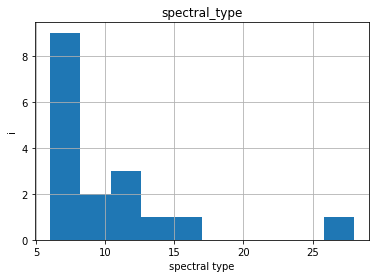

In [147]:
fig=plt.figure(figsize=(17, 10))
NIR_spectraltype.hist(column="spectral_type")
plt.xlabel("spectral type")
plt.ylabel("i")

In [148]:

for i in range(len(OPT_spectraltype['spectral_type'])):
    try:
        OPT_spectraltype['spectral_type'].loc[i] = float(OPT_spectraltype['spectral_type'].loc[i])
    except ValueError:   
        print(i , ' cannot be converted')
        OPT_spectraltype.drop([i])#anything that can't be converted to a float is removed

295  cannot be converted
341  cannot be converted


In [133]:
OPT_spectraltype['spectral_type'].loc[0]

'10.0'

In [149]:

for i in range(len(IR_spectraltype['spectral_type'])):
    try:
        IR_spectraltype['spectral_type'].loc[i] = float(IR_spectraltype['spectral_type'].loc[i])
    except ValueError:   
        print(i , ' cannot be converted')
        IR_spectraltype.drop([i])#anything that can't be converted to a float is removed

451  cannot be converted


AttributeError: 'NoneType' object has no attribute 'update'

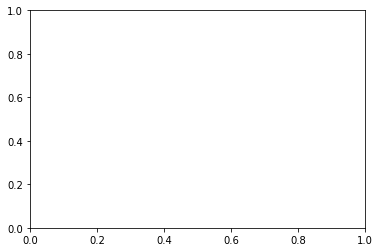

In [150]:
plt.hist(IR_spectraltype['spectral_type'])
plt.xlabel("spectral type")
plt.ylabel("i")

In [ ]:
plt.hist(OPT_spectraltype['spectral_type'])
plt.xlabel("spectral type")
plt.ylabel("i")

In [127]:
def plotCoords(OPT_spectraltype, IR_spectraltype, NIR_spectraytype):
    import astropy.coordinates as coord
    import astropy.units as u
    import matplotlib.pyplot as plt
    import numpy as np
    
    OPT_ra = coord.Angle(pd.to_numeric(OPT_spectraltype['ra']).fillna(np.nan).values*u.degree)
    OPT_ra = OPT_ra.wrap_at(180*u.degree)
    OPT_dec = coord.Angle(pd.to_numeric(OPT_spectraltype['dec']).fillna(np.nan).values*u.degree)
    IR_ra = coord.Angle(pd.to_numeric(IR_spectraltype['ra']).fillna(np.nan).values*u.degree)
    IR_ra = IR_ra.wrap_at(180*u.degree)
    IR_dec = coord.Angle(pd.to_numeric(IR_spectraltype['dec']).fillna(np.nan).values*u.degree)
    NIR_ra = coord.Angle(pd.to_numeric(NIR_spectraltype['ra']).fillna(np.nan).values*u.degree)
    NIR_ra = NIR_ra.wrap_at(180*u.degree)
    NIR_dec = coord.Angle(pd.to_numeric(NIR_spectraltype['dec']).fillna(np.nan).values*u.degree)

    fig = plt.figure(figsize=(14,12))
    ax = fig.add_subplot(111, projection="mollweide")
    ax.set_facecolor('#17303F')
    plt.title("BDNYC Brown Dwarfs")
    plt.grid(True)
    ax.scatter(OPT_ra.radian, OPT_dec.radian, color="#E5E5E5")
    ax.scatter(IR_ra.radian, IR_dec.radian, color="#E5E5E5")
    ax.scatter(NIR_ra.radian, NIR_dec.radian, color="#E5E5E5")
    ax.legend(loc=4)
    

No handles with labels found to put in legend.


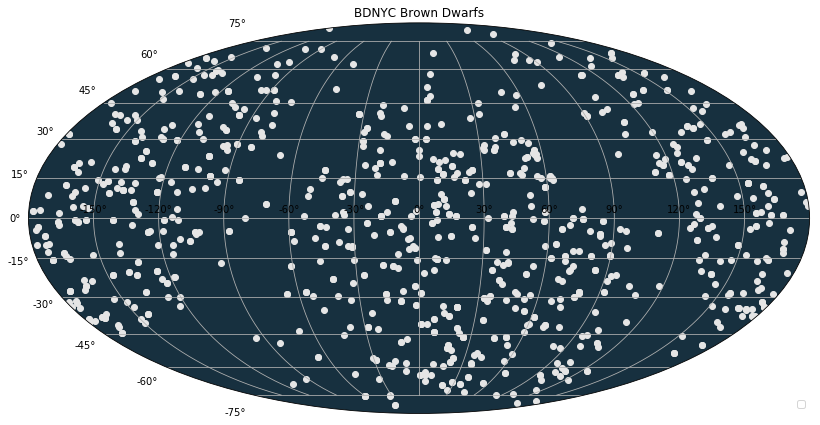

In [128]:
plottedcoords = plotCoords(OPT_spectraltype, IR_spectraltype, NIR_spectraltype)
plottedcoords

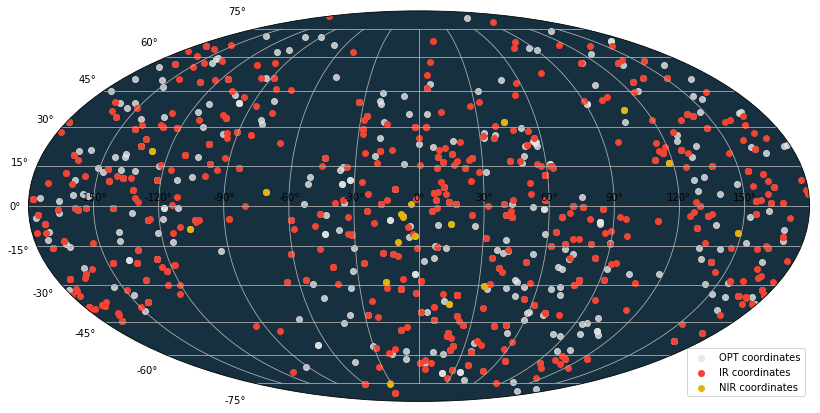

In [118]:
    fig = plt.figure(figsize=(14,12))
    ax = fig.add_subplot(111, projection="mollweide")
    ax.set_facecolor('#17303F')
    plt.grid(True)
    ax.scatter(OPT_ra.radian, OPT_dec.radian, color="#E5E5E5", alpha=.8, edgecolors='face', label='OPT coordinates')
    ax.scatter(IR_ra.radian, IR_dec.radian, color="#F24333", label='IR coordinates')
    ax.scatter(NIR_ra.radian, NIR_dec.radian, color="#E3B505", label='NIR coordinates')
    ax.legend(loc=4)

TypeError: unsupported operand type(s) for /: 'str' and 'float'

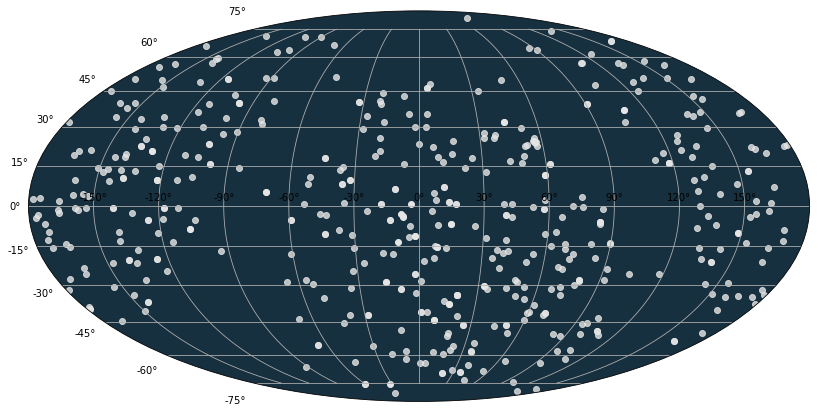

In [169]:
    fig = plt.figure(figsize=(14,12))
    ax = fig.add_subplot(111, projection="mollweide")
    ax.set_facecolor('#17303F')
    cm = plt.cm.get_cmap("Dark2")
    plt.grid(True)
    ax.scatter(OPT_ra.radian, OPT_dec.radian, color="#E5E5E5", alpha=.8, edgecolors='face', label='OPT coordinates')
    ax.scatter(NIR_ra.radian, NIR_dec.radian, color="#E5E5E5", label='NIR coordinates')
    import matplotlib.colors as mpl
    ax.scatter(IR_ra.radian, IR_dec.radian, c = list(IR_spectraltype['spectral_type']/20.0),label='IR coordinates')
    ax.legend(loc=4)

In [161]:
list(IR_spectraltype['spectral_type'].values

[20.0,
 14.0,
 13.5,
 8.5,
 11.0,
 15.0,
 13.0,
 8.0,
 10.0,
 16.0,
 16.5,
 9.0,
 10.0,
 28.0,
 27.0,
 27.0,
 19.0,
 14.5,
 16.0,
 9.5,
 9.0,
 17.5,
 11.0,
 10.0,
 10.0,
 15.0,
 14.0,
 21.0,
 11.0,
 11.0,
 9.0,
 9.0,
 12.0,
 13.0,
 15.0,
 11.0,
 7.0,
 27.0,
 9.0,
 9.0,
 10.0,
 10.5,
 14.0,
 9.0,
 10.0,
 10.0,
 10.0,
 16.0,
 13.0,
 16.0,
 14.0,
 6.0,
 19.5,
 14.0,
 23.5,
 13.0,
 10.0,
 10.0,
 15.5,
 18.0,
 16.0,
 8.5,
 13.0,
 14.0,
 24.5,
 26.5,
 27.5,
 20.0,
 16.0,
 8.5,
 12.0,
 12.0,
 11.0,
 11.0,
 11.0,
 12.0,
 17.5,
 18.0,
 15.0,
 11.0,
 11.0,
 14.0,
 15.0,
 10.0,
 12.0,
 20.0,
 9.0,
 14.5,
 20.5,
 23.0,
 12.0,
 14.0,
 17.0,
 17.0,
 17.5,
 8.0,
 11.0,
 14.0,
 12.0,
 15.5,
 10.0,
 9.0,
 14.5,
 10.0,
 11.0,
 11.0,
 12.5,
 10.0,
 16.5,
 12.0,
 21.0,
 22.5,
 22.0,
 13.5,
 12.0,
 14.0,
 13.0,
 10.0,
 7.0,
 9.0,
 10.0,
 14.0,
 26.0,
 15.5,
 20.0,
 16.0,
 22.5,
 13.0,
 11.0,
 13.0,
 11.0,
 21.5,
 15.0,
 13.0,
 10.0,
 13.0,
 24.5,
 11.0,
 18.0,
 15.0,
 10.0,
 10.0,
 21.5,
 12.5,
 11.0,
 10.

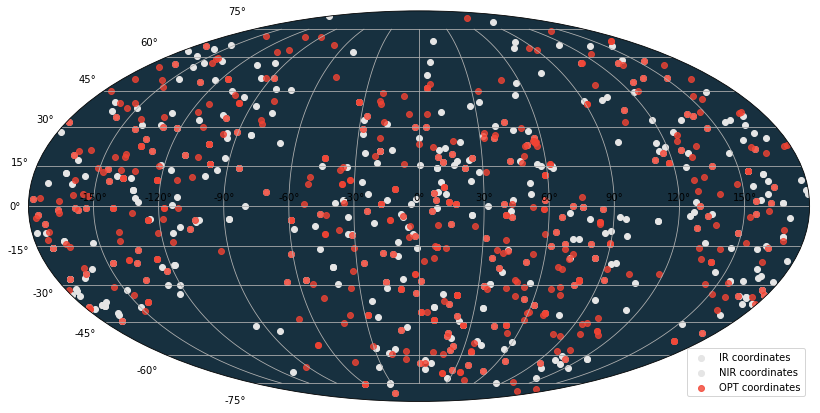

In [120]:
    fig = plt.figure(figsize=(14,12))
    ax = fig.add_subplot(111, projection="mollweide")
    ax.set_facecolor('#17303F')
    plt.grid(True)
    
    ax.scatter(IR_ra.radian, IR_dec.radian, color="#E5E5E5", label='IR coordinates')
    ax.scatter(NIR_ra.radian, NIR_dec.radian, color="#E5E5E5", label='NIR coordinates')
    ax.scatter(OPT_ra.radian, OPT_dec.radian, color="#F24333", alpha=.8, edgecolors='face', label='OPT coordinates')
    ax.legend(loc=4)

ValueError: 'color' kwarg must be an mpl color spec or sequence of color specs.
For a sequence of values to be color-mapped, use the 'c' argument instead.

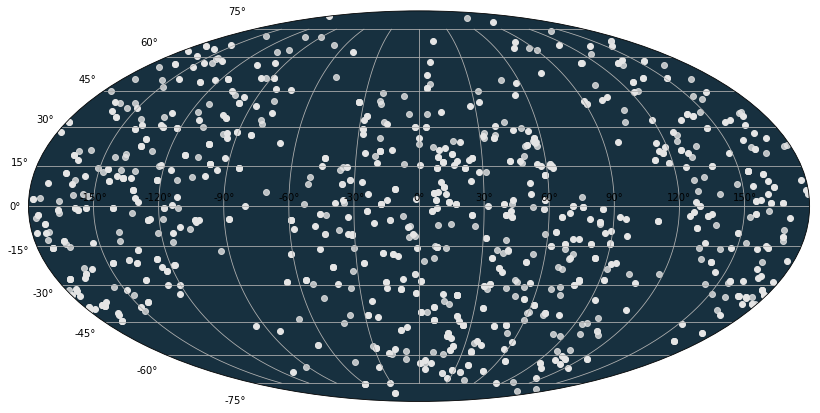

In [129]:
    fig = plt.figure(figsize=(14,12))
    ax = fig.add_subplot(111, projection="mollweide")
    ax.set_facecolor('#17303F')
    plt.grid(True)
    ax.scatter(OPT_ra.radian, OPT_dec.radian, color="#E5E5E5", alpha=.8, edgecolors='face', label='OPT coordinates')
    ax.scatter(IR_ra.radian, IR_dec.radian, color="#E5E5E5", label='IR coordinates')
    ax.scatter(NIR_ra.radian, NIR_dec.radian, color="#binary", label='NIR coordinates')
    ax.legend(loc=4)